# Práctica #2 Motors

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from keras.layers import LeakyReLU


In [2]:
# Leer el archivo CSV
df = pd.read_csv("car_motors.csv")
df.head(5)
# Mostrar las primeras filas del dataframe
df.head(5)


,Aceleracion,Fuerza,Labels
0,3.194978,-1.573232,-2
1,-3.525748,0.866075,-2
2,1.927721,3.666656,0
3,3.305401,-1.335324,-2
4,-0.678097,-3.872477,0


In [3]:
# Separar variables y etiquetas
#x = df[['Aceleracion', 'Fuerza']].values
#y = df['Labels'].values
x=df.iloc[:, :2].values
y=df.iloc[:, -1].values

print(x.shape, len(y))

(200, 2) 200


In [4]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Ejemplo de sobremuestreo de la clase minoritariaA
X_train_resampled, y_train_resampled = resample(X_train, y_train)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 2) (160,)
(40, 2) (40,)


In [5]:
#Crear el (M O D E L O) PERCEPTRON SIMPLE

model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Capa de salida binaria
])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=["accuracy"])


In [7]:
#Entrenar el modelo.

history = model.fit(X_train_resampled, y_train_resampled, epochs=132, batch_size=16)


Epoch 1/132
10/10 [==============================] - 1s 3ms/step - loss: 0.9223 - accuracy: 0.0063
Epoch 2/132
10/10 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.0875
Epoch 3/132
10/10 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.1125
Epoch 4/132
10/10 [==============================] - 0s 2ms/step - loss: 0.7893 - accuracy: 0.1375
Epoch 5/132
10/10 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.1688
Epoch 6/132
10/10 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.2125
Epoch 7/132
10/10 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.2875
Epoch 8/132
10/10 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.3875
Epoch 9/132
10/10 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.4875
Epoch 10/132
10/10 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.5375
Epoch 11/

In [8]:
#Ver los resultados
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 4ms/step - loss: -19.6198 - accuracy: 0.4500
[-19.619808197021484, 0.44999998807907104]


In [9]:
#Evaluar el modelo y ver su presición y saber si es confiable.
sample = X_test[4, :]
prediction = model.predict(np.expand_dims(sample,axis=0))

prediction = 0 if prediction<=0.5 else 1

print(prediction)


1/1 [==============================] - 0s 153ms/step
0


In [10]:
print(y_test [0]== prediction)

False


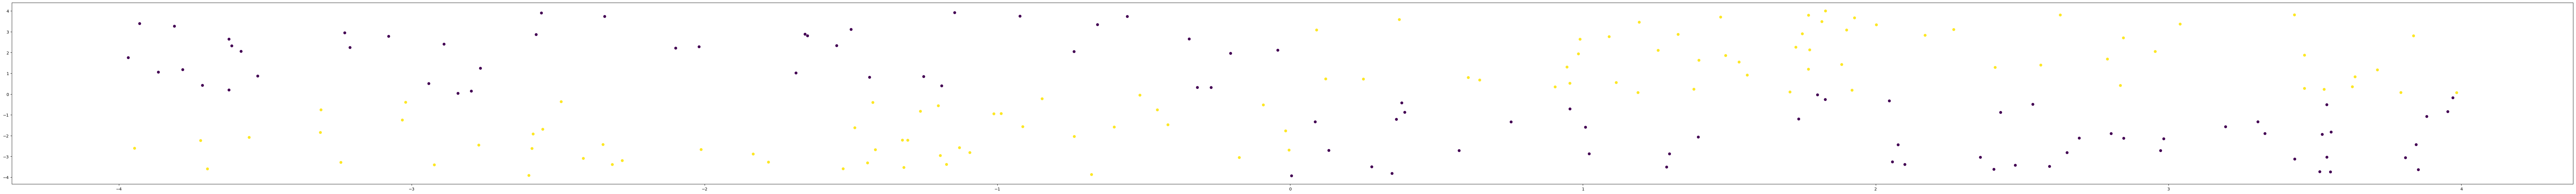

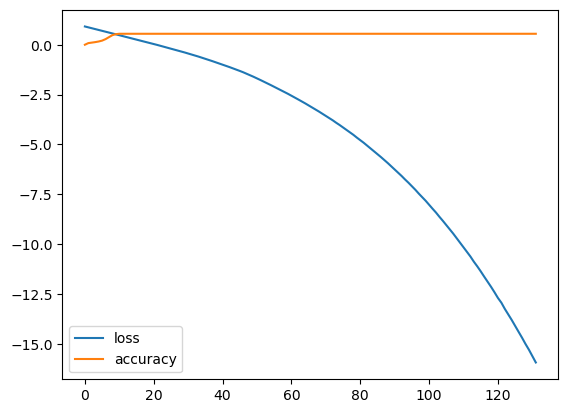

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=[112,8])
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,
            c= df.iloc[:,-1].values)
plt.show()


values=pd.DataFrame(history.history)
values.plot()
plt.show()